# UIUC Grid Demand with Echo State Networks

This notebook uses an Echo State Network(ESN) (from ``pyESN``) to predict
the demand at the University of Illinois.

The following items are included:
1. An initial demonstration of the ESN with a 72-hour prediction.
2. Grid optimization over spectral radius and noise
3. Grid optimization over reservoir size and sparsity
4. Demonstrate the effect of training length on accuracy.
5. A final demonstration of the ESN with optimized hyper-parameters.

### 1. Initial Demonstration

In [7]:
# import libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# custom libraries
from tools import MSE, esn_prediction, param_string, optimal_values
from optimizers import grid_optimizer
from pyESN.pyESN import ESN

In [8]:
# import demand data
dataframe = pd.read_csv("data/uiuc_demand_data.csv", usecols=['time','kw'])
demand = np.array(dataframe.kw).astype('float64')

# normalize
norm = np.linalg.norm(demand)
demand_norm = demand/norm

In [12]:
params = {'n_reservoir':1000, 
          'sparsity':0.1, 
          'rand_seed':85, 
          'rho':1.5, 
          'noise':0.0001, 
          'future':72, 
          'window':72, 
          'trainlen':8000}

In [30]:
futureTotal = params['future']
time_range = np.array(dataframe.time)
hour_range = np.arange(0, len(time_range), 1).reshape((len(time_range),1))

In [14]:
tic = time.perf_counter()

init_pred = esn_prediction(demand_norm, params)

toc = time.perf_counter()
elapsed = toc - tic
print(f"This simulation took {elapsed:0.02f} seconds")
print(f"This simulation took {elapsed/60:0.02f} minutes")

This simulation took 2.95 seconds
This simulation took 0.05 minutes


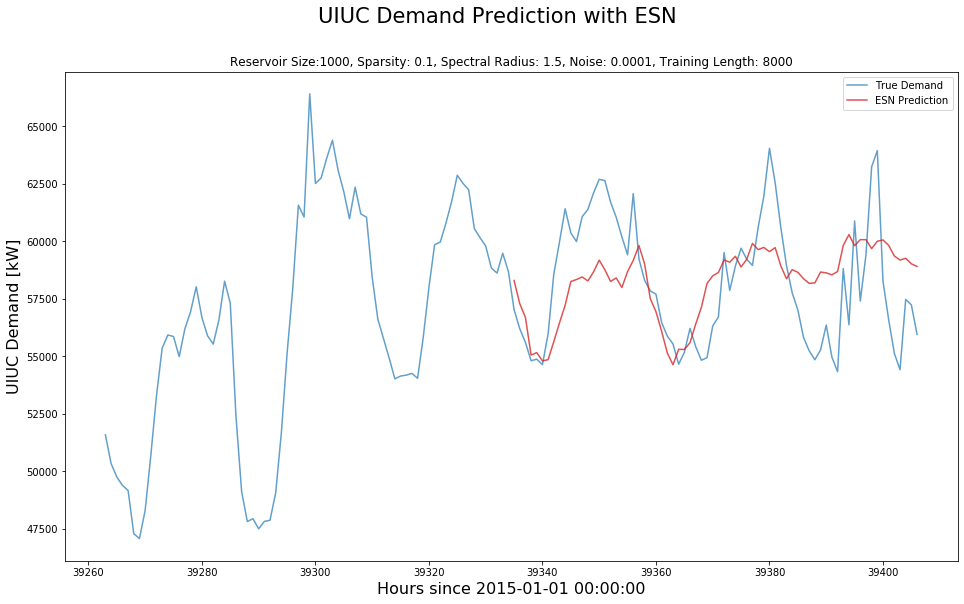

In [6]:
plt.figure(figsize=(16,9))
plt.suptitle("UIUC Demand Prediction with ESN", fontsize=21)
plt.title(param_string(params))
plt.ylabel("UIUC Demand [kW]", fontsize=16)
plt.xlabel(f"Hours since {time_range[0]}", fontsize=16)
# plot the truth
plt.plot(hour_range[-2*futureTotal:],norm*demand_norm[-2*futureTotal:],'b',label="True Demand", 
         alpha=0.7,
         color='tab:blue')
# # plot the prediction
plt.plot(hour_range[-futureTotal:], norm*init_pred,  alpha=0.8, 
         label='ESN Prediction',
         color='tab:red',
         linestyle='-')
plt.legend()

### 2. Grid Optimization Over Spectral Radius and Noise

Optimizing over ['rho', 'noise']:
rho = 0.5, noise = 0.0001, MSE=0.0005147263141197072
rho = 0.5, noise = 0.0003, MSE=0.00048782443148997053
rho = 0.5, noise = 0.0007, MSE=0.00043891658035080856
rho = 0.5, noise = 0.001, MSE=0.00041239164021295835
rho = 0.5, noise = 0.003, MSE=0.00039527190440892486
rho = 0.5, noise = 0.005, MSE=0.0004923327765743809
rho = 0.5, noise = 0.007, MSE=0.0006286663293363784
rho = 0.5, noise = 0.01, MSE=0.0008147778812596353
rho = 0.7, noise = 0.0001, MSE=0.000446306327416837
rho = 0.7, noise = 0.0003, MSE=0.00047115279003267347
rho = 0.7, noise = 0.0007, MSE=0.000448866618573525
rho = 0.7, noise = 0.001, MSE=0.00042857295016230154
rho = 0.7, noise = 0.003, MSE=0.0004122260217376514
rho = 0.7, noise = 0.005, MSE=0.0005270171489407264
rho = 0.7, noise = 0.007, MSE=0.0006793164545735355
rho = 0.7, noise = 0.01, MSE=0.0008718309230689563
rho = 0.9, noise = 0.0001, MSE=0.00032488548441375885
rho = 0.9, noise = 0.0003, MSE=0.0003442968526216916
rho = 0.9, noise = 

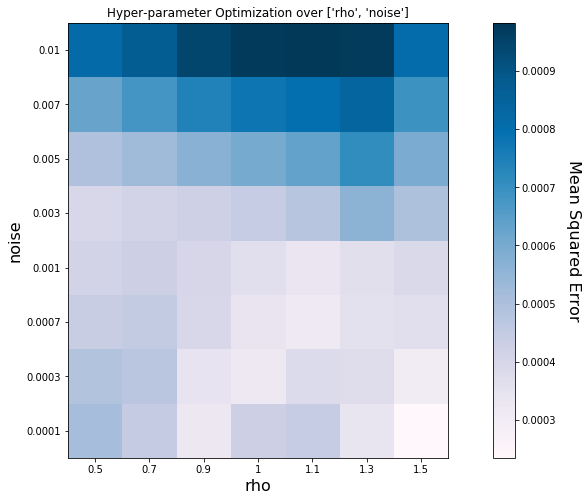

In [8]:
radius_set = [0.5, 0.7, 0.9,  1,  1.1,1.3,1.5]
noise_set = [ 0.0001, 0.0003,0.0007, 0.001, 0.003, 0.005, 0.007,0.01]

radiusxnoise_loss = grid_optimizer(demand_norm,
                      params,
                      args=['rho', 'noise'],
                      xset=radius_set,
                      yset=noise_set,
                      verbose=True,
                      visualize=True)

In [10]:
opt_radius, opt_noise = optimal_values(radiusxnoise_loss, radius_set, noise_set)
params['rho'] = opt_radius
params['noise'] = opt_noise
print(f'The optimal set is:\nspectrum radius = {opt_radius} \nnoise = {opt_noise}')

The optimal set is:
spectrum radius = 1.5 
noise = 0.0001


### 3. Grid Optimization Over Reservoir Size and Sparsity

The algorithm is unstable when ``n_reservoir == trainlen``.

Optimizing over ['n_reservoir', 'sparsity']:
n_reservoir = 600, sparsity = 0.005, MSE=0.00023224249593620008
n_reservoir = 600, sparsity = 0.01, MSE=0.00029839790086802655
n_reservoir = 600, sparsity = 0.03, MSE=0.00021692198582000697
n_reservoir = 600, sparsity = 0.05, MSE=0.00022308582000295782
n_reservoir = 600, sparsity = 0.1, MSE=0.00027976336031970076
n_reservoir = 600, sparsity = 0.15, MSE=0.00034502567658919526
n_reservoir = 600, sparsity = 0.2, MSE=0.00029453369071737276
n_reservoir = 800, sparsity = 0.005, MSE=0.0002326698091204126
n_reservoir = 800, sparsity = 0.01, MSE=0.00024151162856137585
n_reservoir = 800, sparsity = 0.03, MSE=0.00020944053203176326
n_reservoir = 800, sparsity = 0.05, MSE=0.0002091278225031486
n_reservoir = 800, sparsity = 0.1, MSE=0.00022613150724242153
n_reservoir = 800, sparsity = 0.15, MSE=0.0002629732062834135
n_reservoir = 800, sparsity = 0.2, MSE=0.00023801926762029868
n_reservoir = 1000, sparsity = 0.005, MSE=0.0003021912427719335
n_reservoir = 

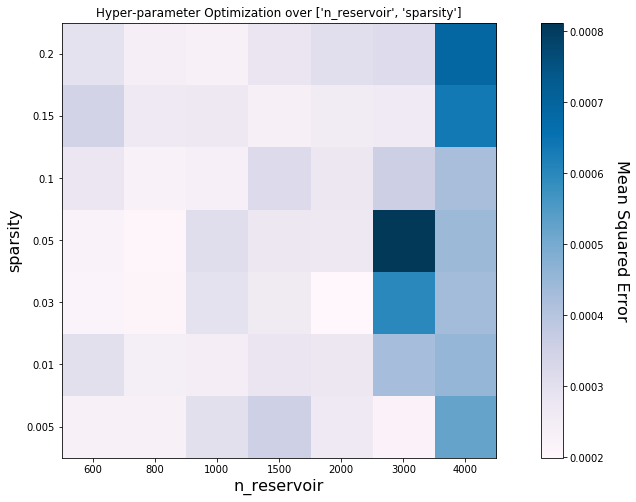

In [11]:
reservoir_set = [600, 800, 1000, 1500, 2000, 3000, 4000]
sparsity_set = [0.005, 0.01, 0.03, 0.05, 0.1, 0.15, 0.2]

sizexsparsity_loss = grid_optimizer(demand_norm,
                      params,
                      args=['n_reservoir', 'sparsity'],
                      xset=reservoir_set,
                      yset=sparsity_set,
                      verbose=True,
                      visualize=True)

In [12]:
opt_size, opt_sparsity = optimal_values(sizexsparsity_loss, reservoir_set, sparsity_set)
params['n_reservoir'] = opt_size
params['sparsity'] = opt_sparsity
print(f'The optimal set is:\nreservoir size = {opt_size} \nsparsity = {opt_sparsity}')

The optimal set is:
reservoir size = 2000 
sparsity = 0.03


### 4. Demonstrate the Effect of Training Length

Once again, the algorithm is unstable when ``n_reservoir == trainlen``.

We should expect that MSE will decrease as training length increases.

Optimizing over ['trainlen']:
trainlen = 4000, MSE=0.0006787466893412016
trainlen = 4300, MSE=0.0006198836280293635
trainlen = 4600, MSE=0.0006670760339399106
trainlen = 4900, MSE=0.0004800996664881757
trainlen = 5200, MSE=0.00041564257429987055
trainlen = 5500, MSE=0.0004117699925699248
trainlen = 5800, MSE=0.00031976766707893966
trainlen = 6100, MSE=0.0002921778126329372
trainlen = 6400, MSE=0.0002656203281849534
trainlen = 6700, MSE=0.0006068217849040268
trainlen = 7000, MSE=0.0009745415450263664
trainlen = 7300, MSE=0.0004898255884503885
trainlen = 7600, MSE=0.0002775155956097815
trainlen = 7900, MSE=0.0002834929786033538
trainlen = 8200, MSE=0.0002717920645408323
trainlen = 8500, MSE=0.0006612167933040435
trainlen = 8800, MSE=0.00039001019421366803
trainlen = 9100, MSE=0.0004585343379831804
trainlen = 9400, MSE=0.00041389147850719795
trainlen = 9700, MSE=0.00029687576134865756
trainlen = 10000, MSE=0.0003984791326312985
trainlen = 10300, MSE=0.0002937740126815854
trainlen = 10600,

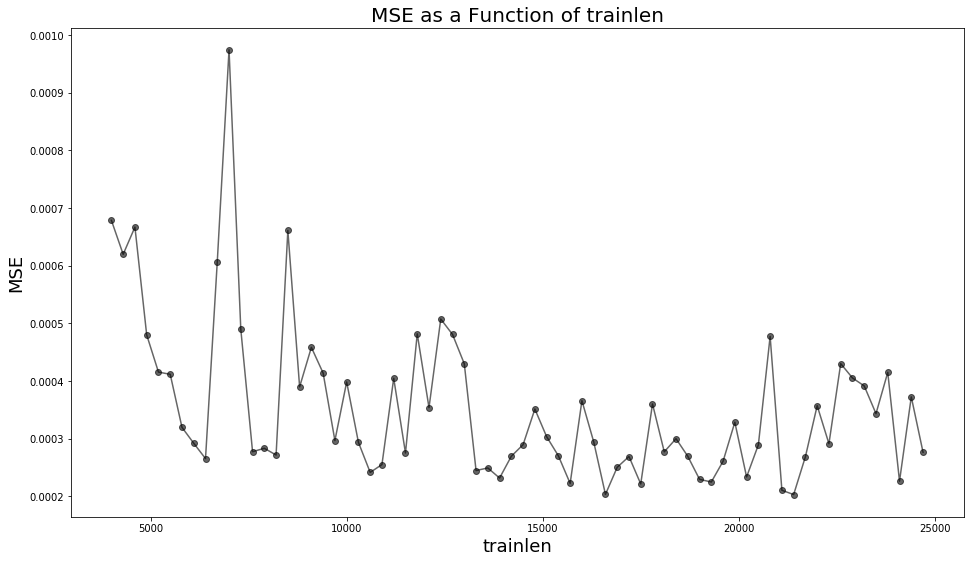

In [13]:
trainingLengths = np.arange(4000,25000,300)
trainlen_loss = grid_optimizer(demand_norm,
                      params,
                      args=['trainlen'],
                      xset=trainingLengths,
                      verbose=True,
                      visualize=True)

In [16]:
minloss = np.min(trainlen_loss)
index_min = np.where(trainlen_loss == minloss)
l_opt = trainingLengths[index_min][0]
params['trainlen'] = l_opt

print(f"Training length with minimum error was: {l_opt}")

Training length with minimum error was: 21400


### 5. Optimized Demand Prediction

In [17]:
tic = time.perf_counter()

opt_pred = esn_prediction(demand_norm, params)

toc = time.perf_counter()
elapsed = toc - tic
print(f"This simulation took {elapsed:0.02f} seconds")
print(f"This simulation took {elapsed/60:0.02f} minutes")

This simulation took 84.93 seconds
This simulation took 1.42 minutes


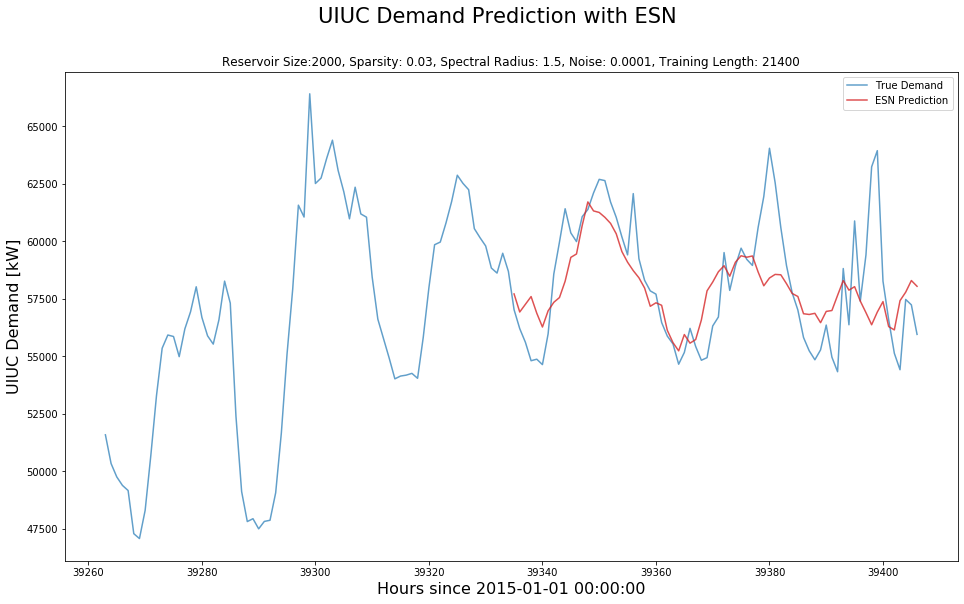

In [18]:
plt.figure(figsize=(16,9))
plt.suptitle("UIUC Demand Prediction with ESN", fontsize=21)
plt.title(param_string(params))
plt.ylabel("UIUC Demand [kW]", fontsize=16)
plt.xlabel(f"Hours since {time_range[0]}", fontsize=16)
# plot the truth
plt.plot(hour_range[-2*futureTotal:],norm*demand_norm[-2*futureTotal:],'b',label="True Demand", 
         alpha=0.7,
         color='tab:blue')
# # plot the prediction
plt.plot(hour_range[-futureTotal:], norm*opt_pred,  alpha=0.8, 
         label='ESN Prediction',
         color='tab:red',
         linestyle='-')
plt.legend()

### Uncertainty Calculation

This section will calculate uncertainty by using the RSME of the prediction compared to the ground truth rather than a deviation across several simulations.

In [44]:
tic = time.perf_counter()

init_pred = esn_prediction(demand_norm, params)

toc = time.perf_counter()
elapsed = toc - tic
print(f"This simulation took {elapsed:0.02f} seconds")
print(f"This simulation took {elapsed/60:0.02f} minutes")

This simulation took 2.55 seconds
This simulation took 0.04 minutes


In [45]:
from sklearn.metrics import mean_squared_error

pred = init_pred*norm
true = demand_norm[-futureTotal:]*norm

rsme = mean_squared_error(true, pred, squared=False)
print(rsme)

2385.8360817762887


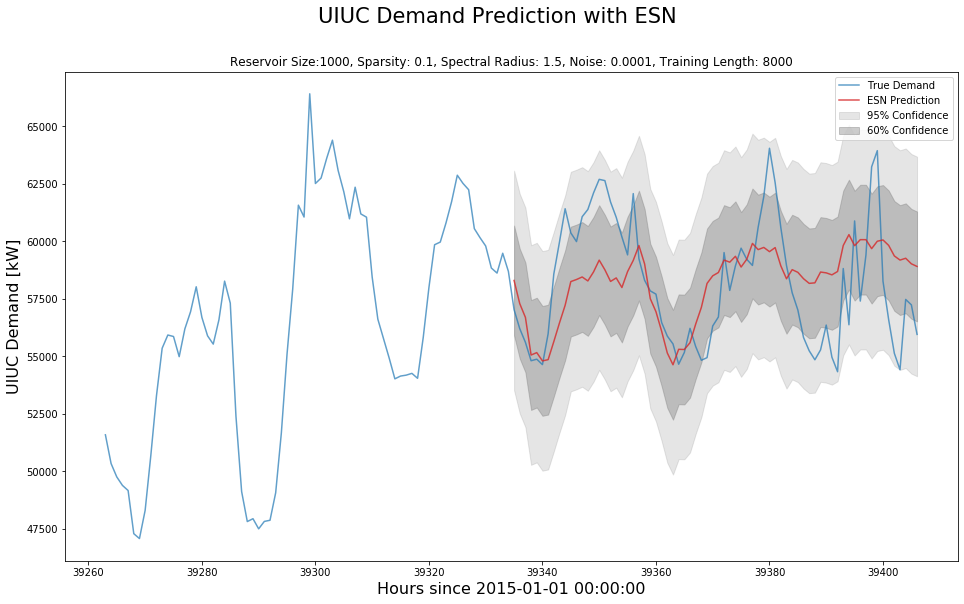

In [46]:
plt.figure(figsize=(16,9))
plt.suptitle("UIUC Demand Prediction with ESN", fontsize=21)
plt.title(param_string(params))
plt.ylabel("UIUC Demand [kW]", fontsize=16)
plt.xlabel(f"Hours since {time_range[0]}", fontsize=16)
# plot the truth
plt.plot(hour_range[-2*futureTotal:],norm*demand_norm[-2*futureTotal:],'b',label="True Demand", 
         alpha=0.7,
         color='tab:blue')
# # plot the prediction
plt.plot(hour_range[-futureTotal:], norm*init_pred,  alpha=0.8, 
         label='ESN Prediction',
         color='tab:red',
         linestyle='-')

plt.fill_between(hour_range[-futureTotal:].flatten(),
                 (norm*init_pred + 2*rsme).flatten(),
                 (norm*init_pred - 2*rsme).flatten(),
                 color='gray', alpha=0.2, label='95% Confidence')
plt.fill_between(hour_range[-futureTotal:].flatten(),
                 (norm*init_pred + rsme).flatten(),
                 (norm*init_pred - rsme).flatten(),
                 color='gray', alpha=0.4, label='60% Confidence')
plt.legend()

#### With optimal parameters...

In [53]:
opt_params = {'n_reservoir':2000, 
          'sparsity':0.03, 
          'rand_seed':85, 
          'rho':1.5, 
          'noise':0.0001, 
          'future':72, 
          'window':72, 
          'trainlen':21400}

In [54]:
tic = time.perf_counter()

opt_pred = esn_prediction(demand_norm, opt_params)

toc = time.perf_counter()
elapsed = toc - tic
print(f"This simulation took {elapsed:0.02f} seconds")
print(f"This simulation took {elapsed/60:0.02f} minutes")

This simulation took 45.29 seconds
This simulation took 0.75 minutes


In [55]:
pred = opt_pred*norm
true = demand_norm[-futureTotal:]*norm

rsme = mean_squared_error(true, pred, squared=False)
print(rsme)

2061.172485399759


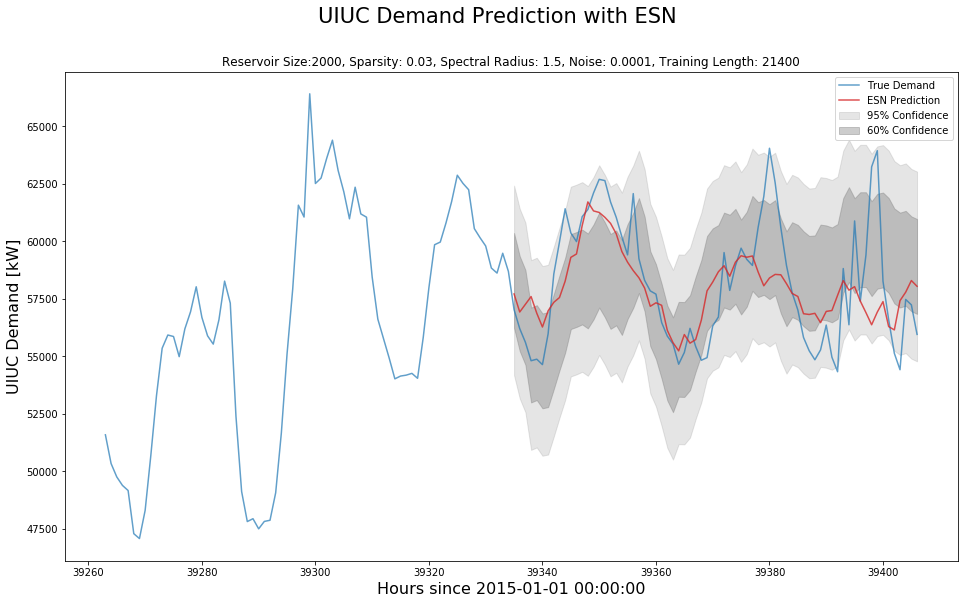

In [60]:
plt.figure(figsize=(16,9))
plt.suptitle("UIUC Demand Prediction with ESN", fontsize=21)
plt.title(param_string(opt_params))
plt.ylabel("UIUC Demand [kW]", fontsize=16)
plt.xlabel(f"Hours since {time_range[0]}", fontsize=16)
# plot the truth
plt.plot(hour_range[-2*futureTotal:],norm*demand_norm[-2*futureTotal:],'b',label="True Demand", 
         alpha=0.7,
         color='tab:blue')
# # plot the prediction
plt.plot(hour_range[-futureTotal:], norm*opt_pred,  alpha=0.8, 
         label='ESN Prediction',
         color='tab:red',
         linestyle='-')

plt.fill_between(hour_range[-futureTotal:].flatten(),
                 (norm*init_pred + 2*rsme).flatten(),
                 (norm*init_pred - 2*rsme).flatten(),
                 color='gray', alpha=0.2, label='95% Confidence')
plt.fill_between(hour_range[-futureTotal:].flatten(),
                 (norm*init_pred + rsme).flatten(),
                 (norm*init_pred - rsme).flatten(),
                 color='gray', alpha=0.4, label='60% Confidence')
plt.legend()

### Uncertainty Prediction with Several Simulations

In [47]:
rand_seeds = [85, 21, 22, 30, 122, 5, 79]

In [49]:
N = len(rand_seeds)
predictions = np.ones((N, futureTotal))

tic = time.perf_counter()

for x, seed in enumerate(rand_seeds):
    print(f"Running Simulation {x}")
    params['rand_seed'] = seed
    prediction = esn_prediction(demand_norm, params)
    predictions[x] = prediction.T
    
toc = time.perf_counter()
elapsed = toc - tic
print(f"This simulation took {elapsed:0.02f} seconds")
print(f"This simulation took {elapsed/60:0.02f} minutes")

Running Simulation 0
Running Simulation 1
Running Simulation 2
Running Simulation 3
Running Simulation 4
Running Simulation 5
Running Simulation 6
This simulation took 19.87 seconds
This simulation took 0.33 minutes


In [50]:
mean_prediction = np.mean(predictions, axis=0)
std_prediction = np.std(predictions, axis=0)

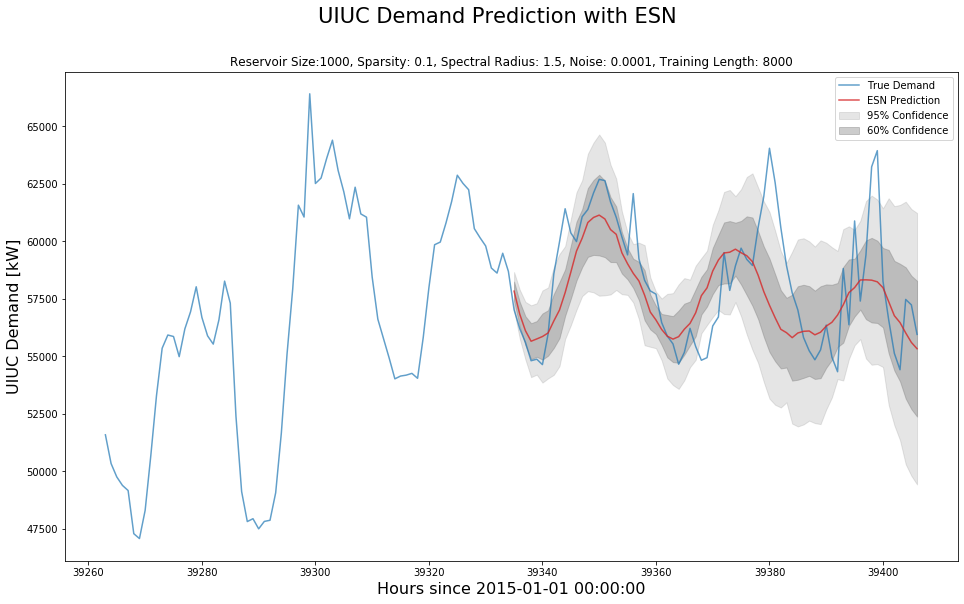

In [52]:
plt.figure(figsize=(16,9))
plt.suptitle("UIUC Demand Prediction with ESN", fontsize=21)
plt.title(param_string(params))
plt.ylabel("UIUC Demand [kW]", fontsize=16)
plt.xlabel(f"Hours since {time_range[0]}", fontsize=16)
# plot the truth
plt.plot(hour_range[-2*futureTotal:],norm*demand_norm[-2*futureTotal:],'b',label="True Demand", 
         alpha=0.7,
         color='tab:blue')
# # plot the prediction
plt.plot(hour_range[-futureTotal:], norm*mean_prediction,  alpha=0.8, 
         label='ESN Prediction',
         color='tab:red',
         linestyle='-')
plt.fill_between(hour_range[-futureTotal:].flatten(),
                 norm*(mean_prediction + 2 * std_prediction).flatten(),
                 norm*(mean_prediction - 2 * std_prediction).flatten(),
                 color='gray', alpha=0.2, label='95% Confidence')
plt.fill_between(hour_range[-futureTotal:].flatten(),
                 norm*(mean_prediction + std_prediction).flatten(),
                 norm*(mean_prediction - std_prediction).flatten(),
                 color='gray', alpha=0.4
                 , label='60% Confidence')
plt.legend()

In [69]:
N = len(rand_seeds)
opt_predictions = np.ones((N, futureTotal))

tic = time.perf_counter()

for x, seed in enumerate(rand_seeds):
    print(f"Running Simulation {x} : Seed {seed}")
    opt_params['rand_seed'] = seed
    prediction = esn_prediction(demand_norm, opt_params)
    opt_predictions[x] = prediction.T
    
toc = time.perf_counter()
elapsed = toc - tic
print(f"This simulation took {elapsed:0.02f} seconds")
print(f"This simulation took {elapsed/60:0.02f} minutes")

optmean_prediction = np.mean(opt_predictions, axis=0)
optstd_prediction = np.std(opt_predictions, axis=0)

Running Simulation 0 : Seed 85
Running Simulation 1 : Seed 21
Running Simulation 2 : Seed 22
Running Simulation 3 : Seed 30
Running Simulation 4 : Seed 122
Running Simulation 5 : Seed 5
Running Simulation 6 : Seed 79
This simulation took 311.02 seconds
This simulation took 5.18 minutes


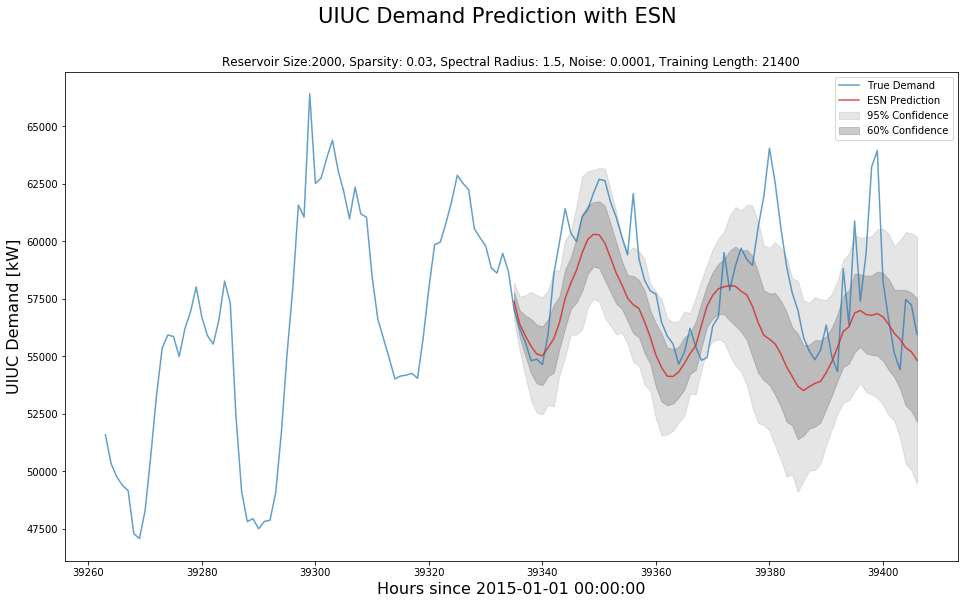

In [70]:
plt.figure(figsize=(16,9))
plt.suptitle("UIUC Demand Prediction with ESN", fontsize=21)
plt.title(param_string(opt_params))
plt.ylabel("UIUC Demand [kW]", fontsize=16)
plt.xlabel(f"Hours since {time_range[0]}", fontsize=16)
# plot the truth
plt.plot(hour_range[-2*futureTotal:],norm*demand_norm[-2*futureTotal:],'b',label="True Demand", 
         alpha=0.7,
         color='tab:blue')
# # plot the prediction
plt.plot(hour_range[-futureTotal:], norm*optmean_prediction,  alpha=0.8, 
         label='ESN Prediction',
         color='tab:red',
         linestyle='-')
plt.fill_between(hour_range[-futureTotal:].flatten(),
                 norm*(optmean_prediction + 2 * optstd_prediction).flatten(),
                 norm*(optmean_prediction - 2 * optstd_prediction).flatten(),
                 color='gray', alpha=0.2, label='95% Confidence')
plt.fill_between(hour_range[-futureTotal:].flatten(),
                 norm*(optmean_prediction + optstd_prediction).flatten(),
                 norm*(optmean_prediction - optstd_prediction).flatten(),
                 color='gray', alpha=0.4
                 , label='60% Confidence')
plt.legend()